In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('1.xlsx')

print(df.head())
print(df.info())
print(df.describe())


   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  
0   2.55     17850.0  United Kingdom  
1   3.39     17850.0  United Kingdom  
2   2.75     17850.0  United Kingdom  
3   3.39     17850.0  United Kingdom  
4   3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-

In [ ]:
print(df.isnull().sum())

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.dropna(inplace=True)


In [ ]:
print(df.isnull().sum())

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64


In [ ]:
print(df['Itemname'].value_counts())
print(df['Country'].value_counts())
print(df['CustomerID'].nunique())


Itemname
WHITE HANGING HEART T-LIGHT HOLDER    1964
REGENCY CAKESTAND 3 TIER              1634
JUMBO BAG RED RETROSPOT               1588
ASSORTED COLOUR BIRD ORNAMENT         1378
PARTY BUNTING                         1362
                                      ... 
72 CAKE CASES VINTAGE CHRISTMAS          1
WRAP BLUE RUSSIAN FOLKART                1
DUSTY PINK CHRISTMAS TREE 30CM           1
BLACKCHRISTMAS TREE 30CM                 1
PAPER CRAFT , LITTLE BIRDIE              1
Name: count, Length: 3846, dtype: int64
Country
United Kingdom          349186
Germany                   9027
France                    8327
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Sweden                     450
Austria                    398
Poland                     330
Japan                      321
Israe

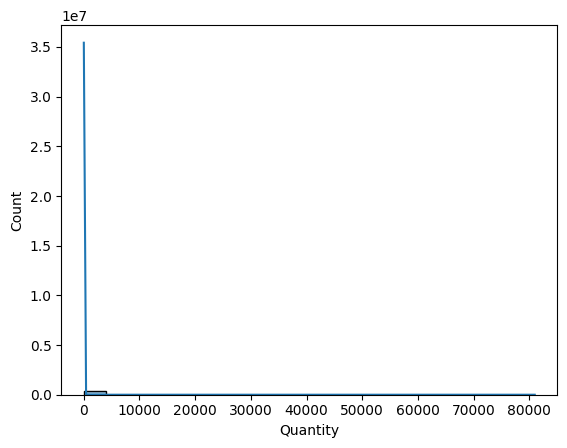

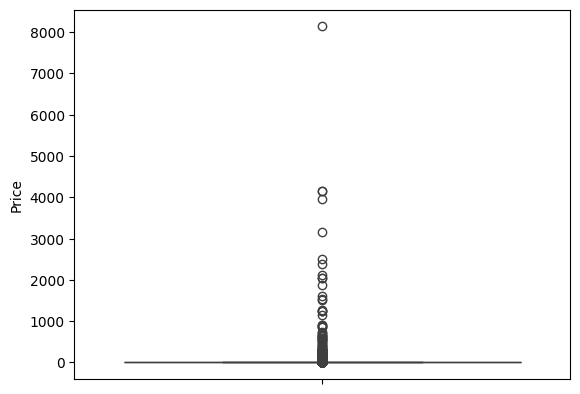

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Quantity'], kde=True, bins=20)
plt.show()

sns.boxplot(df['Price'])
plt.show()



In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday


In [ ]:
df['Revenue'] = df['Quantity'] * df['Price']
df.head()


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Day,Weekday,Revenue
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,2,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,2,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,20.34


In [ ]:
customer_transactions = df.groupby('CustomerID')['BillNo'].nunique()
print(customer_transactions.describe())


count    4297.000000
mean        4.226902
std         7.090722
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       210.000000
Name: BillNo, dtype: float64


In [ ]:
country_sales = df.groupby('Country')['Revenue'].sum()
print(country_sales.sort_values())


Country
Saudi Arabia                145.920
Bahrain                     548.400
RSA                        1002.310
Brazil                     1143.600
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2660.770
Malta                      2725.590
USA                        3580.390
Iceland                    4310.000
Greece                     4760.520
Israel                     7205.840
Poland                     7334.650
Austria                   10198.680
Italy                     17483.240
Singapore                 21279.290
Portugal                  33375.840
Norway                    36165.440
Japan                     37416.370
Sweden                    38367.830
Belgium                   41196.340
Switzerland               56443.950
Spain                     61558.560
Australia                138453.810
France                   208934.310
Germany                  228678.400
Netherlands         

In [ ]:
top_items = df.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)
print(top_items.head(10))


Itemname
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77436
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53071
JUMBO BAG RED RETROSPOT               45612
WHITE HANGING HEART T-LIGHT HOLDER    35406
ASSORTED COLOUR BIRD ORNAMENT         34967
PACK OF 72 RETROSPOT CAKE CASES       31822
POPCORN HOLDER                        29783
RABBIT NIGHT LIGHT                    26895
MINI PAINT SET VINTAGE                25320
Name: Quantity, dtype: int64


In [ ]:
profitable_items = df.groupby('Itemname')['Revenue'].sum().sort_values(ascending=False)
print(profitable_items.head(10))


Itemname
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              133975.90
WHITE HANGING HEART T-LIGHT HOLDER     96875.50
JUMBO BAG RED RETROSPOT                84136.02
MEDIUM CERAMIC TOP STORAGE JAR         80846.97
POSTAGE                                72663.02
PARTY BUNTING                          66712.73
ASSORTED COLOUR BIRD ORNAMENT          55912.79
RABBIT NIGHT LIGHT                     50763.32
Manual                                 48880.70
Name: Revenue, dtype: float64


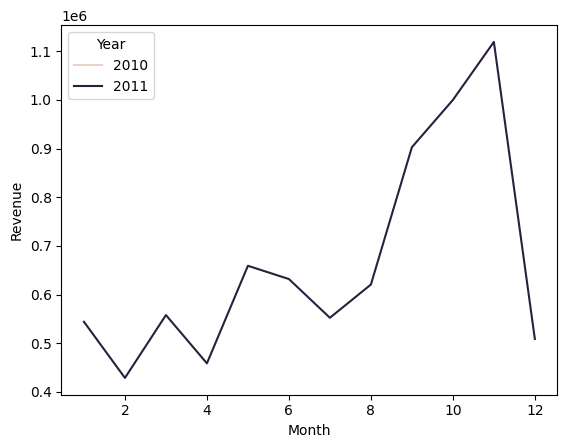

In [ ]:
monthly_sales = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

sns.lineplot(data=monthly_sales, x='Month', y='Revenue', hue='Year')
plt.show()


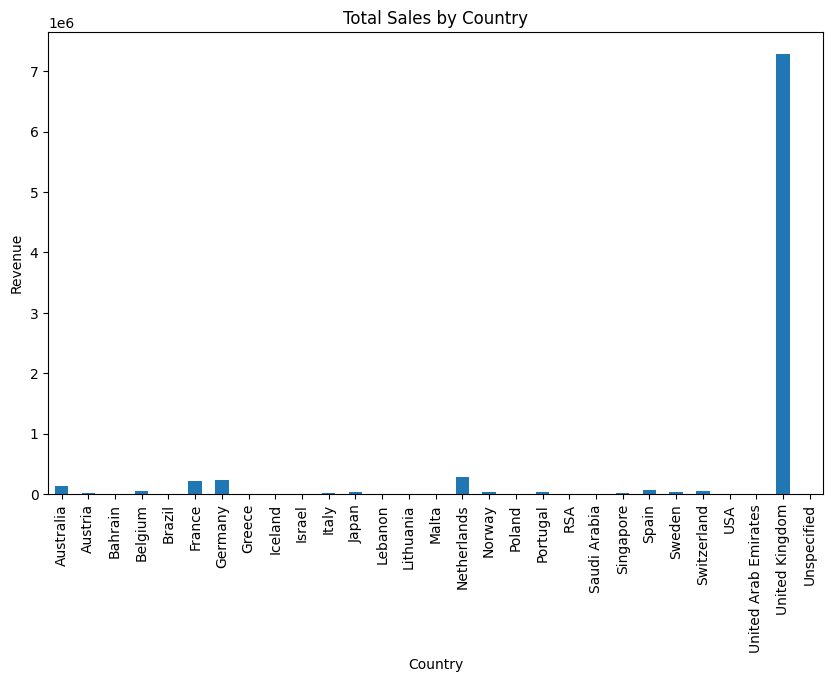

In [ ]:
country_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales by Country')
plt.ylabel('Revenue')
plt.xlabel('Country')
plt.show()


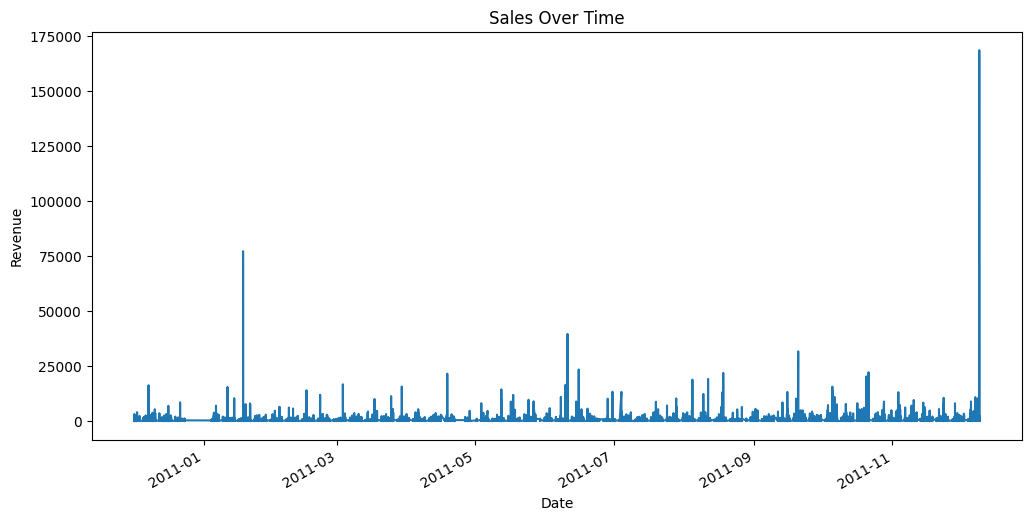

In [ ]:
daily_sales = df.groupby('Date')['Revenue'].sum()
daily_sales.plot(figsize=(12, 6))
plt.title('Sales Over Time')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.show()


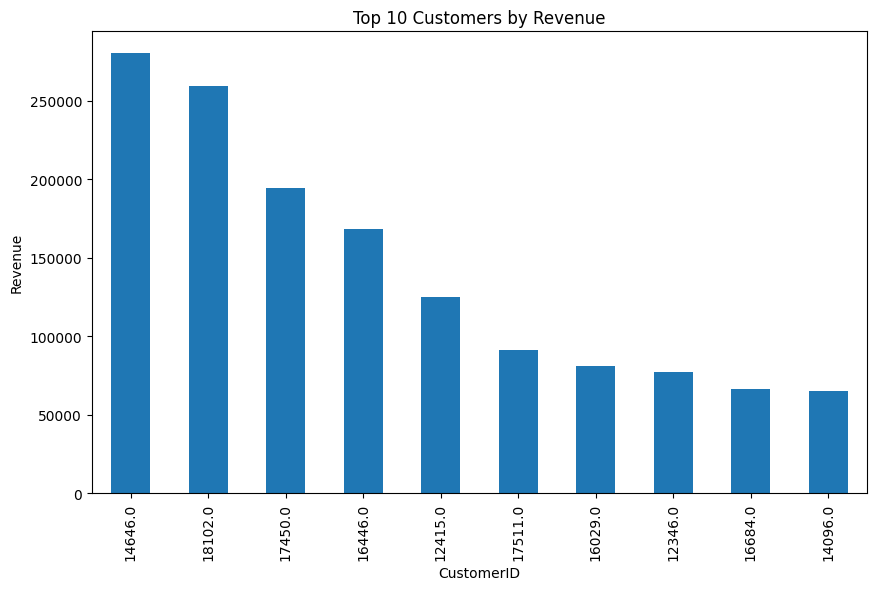

In [ ]:
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Customers by Revenue')
plt.ylabel('Revenue')
plt.xlabel('CustomerID')
plt.show()


MAJOR ANALYSIS (detailed using group by )

In [ ]:
import pandas as pd

data = pd.read_excel('1.xlsx')

unique_counts = {
    'BillNo': data['BillNo'].nunique(),
    'Itemname': data['Itemname'].nunique(),
    'CustomerID': data['CustomerID'].nunique(),
    'Country': data['Country'].nunique()
}

missing_values = data.isnull().sum()

unique_counts, missing_values


({'BillNo': 21663, 'Itemname': 4185, 'CustomerID': 4297, 'Country': 30},
 BillNo             0
 Itemname        1455
 Quantity           0
 Date               0
 Price              0
 CustomerID    134041
 Country            0
 dtype: int64)

In [ ]:
cleaned_data = data.dropna(subset=['Itemname', 'CustomerID'])
cleaned_data['Revenue'] = cleaned_data['Quantity'] * cleaned_data['Price']
total_revenue = cleaned_data['Revenue'].sum()
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])
cleaned_data['Month'] = cleaned_data['Date'].dt.to_period('M')
monthly_revenue = cleaned_data.groupby('Month')['Revenue'].sum()
cleaned_data['Week'] = cleaned_data['Date'].dt.to_period('W')
weekly_revenue = cleaned_data.groupby('Week')['Revenue'].sum()
total_revenue, monthly_revenue, weekly_revenue


<ipython-input-3-3cedb63298d4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Revenue'] = cleaned_data['Quantity'] * cleaned_data['Price']
<ipython-input-3-3cedb63298d4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])
<ipython-input-3-3cedb63298d4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

(8564526.394,
 Month
 2010-12     559771.360
 2011-01     545428.750
 2011-02     429738.240
 2011-03     559322.330
 2011-04     459456.541
 2011-05     660355.190
 2011-06     633014.130
 2011-07     553367.511
 2011-08     621838.530
 2011-09     904647.182
 2011-10    1003374.320
 2011-11    1124598.500
 2011-12     509613.810
 Freq: M, Name: Revenue, dtype: float64,
 Week
 2010-11-29/2010-12-05    146780.600
 2010-12-06/2010-12-12    208518.590
 2010-12-13/2010-12-19    159415.210
 2010-12-20/2010-12-26     45056.960
 2011-01-03/2011-01-09    114607.270
 2011-01-10/2011-01-16    137392.720
 2011-01-17/2011-01-23    171873.980
 2011-01-24/2011-01-30    102736.700
 2011-01-31/2011-02-06    104279.800
 2011-02-07/2011-02-13     86021.460
 2011-02-14/2011-02-20    115336.680
 2011-02-21/2011-02-27    128360.620
 2011-02-28/2011-03-06    107526.860
 2011-03-07/2011-03-13     99182.760
 2011-03-14/2011-03-20    127211.950
 2011-03-21/2011-03-27    128752.610
 2011-03-28/2011-04-03    14

In [ ]:
top_items = cleaned_data.groupby('Itemname').agg(
    TotalRevenue=('Revenue', 'sum'),
    TotalQuantity=('Quantity', 'sum')
).sort_values(by='TotalRevenue', ascending=False).head(5)

top_items


,TotalRevenue,TotalQuantity
Itemname,,
"PAPER CRAFT , LITTLE BIRDIE",168469.60,80995
REGENCY CAKESTAND 3 TIER,134253.10,11679
WHITE HANGING HEART T-LIGHT HOLDER,96931.55,35425
JUMBO BAG RED RETROSPOT,84316.26,45715
MEDIUM CERAMIC TOP STORAGE JAR,80846.97,77436


In [ ]:
top_countries = cleaned_data.groupby('Country').agg(
    TotalRevenue=('Revenue', 'sum'),
    TotalOrders=('BillNo', 'nunique')
).assign(AverageOrderValue=lambda x: x['TotalRevenue'] / x['TotalOrders']).sort_values(by='TotalRevenue', ascending=False).head(5)

top_countries


,TotalRevenue,TotalOrders,AverageOrderValue
Country,,,
United Kingdom,7308391.554,16649,438.968800
Netherlands,285446.340,95,3004.698316
Germany,228867.140,457,500.803370
France,209024.050,389,537.336889
Australia,138521.310,57,2430.198421


In [ ]:
top_customers = cleaned_data.groupby('CustomerID').agg(
    TotalRevenue=('Revenue', 'sum'),
    TotalOrders=('BillNo', 'nunique')
).assign(AverageOrderValue=lambda x: x['TotalRevenue'] / x['TotalOrders']).sort_values(by='TotalRevenue', ascending=False).head(5)

top_customers


,TotalRevenue,TotalOrders,AverageOrderValue
CustomerID,,,
14646.0,280206.02,74,3786.567838
18102.0,259657.30,60,4327.621667
17450.0,194550.79,46,4229.365000
16446.0,168472.50,2,84236.250000
12415.0,124914.53,21,5948.310952


In [ ]:
customer_behavior_by_country = cleaned_data.groupby(['Country', 'CustomerID']).agg(
    TotalRevenue=('Revenue', 'sum'),
    TotalOrders=('BillNo', 'nunique')
).assign(AverageOrderValue=lambda x: x['TotalRevenue'] / x['TotalOrders'])

country_behavior_summary = customer_behavior_by_country.groupby('Country').agg(
    AverageRevenue=('TotalRevenue', 'mean'),
    AverageOrders=('TotalOrders', 'mean'),
    AverageAOV=('AverageOrderValue', 'mean')
).sort_values(by='AverageRevenue', ascending=False)

country_behavior_summary


,AverageRevenue,AverageOrders,AverageAOV
Country,,,
Netherlands,31716.260000,10.555556,655.866389
Singapore,21279.290000,7.000000,3039.898571
Australia,15391.256667,6.333333,998.215519
Sweden,4797.291250,4.500000,584.548604
Japan,4677.046250,2.375000,1343.376250
Iceland,4310.000000,7.000000,615.714286
Norway,3616.544000,3.600000,1152.612657
Switzerland,2687.807143,2.428571,1293.594405
Germany,2434.756809,4.861702,542.892483


In [ ]:
category_country_aov = cleaned_data.groupby(['Country', 'Itemname']).agg(
    TotalRevenue=('Revenue', 'sum'),
    TotalOrders=('BillNo', 'nunique')
).assign(AverageOrderValue=lambda x: x['TotalRevenue'] / x['TotalOrders'])

country_category_aov_summary = category_country_aov.groupby('Country').agg(
    AverageAOV_byCategory=('AverageOrderValue', 'mean')
).sort_values(by='AverageAOV_byCategory', ascending=False)

country_category_aov_summary


,AverageAOV_byCategory
Country,
Australia,116.894372
Netherlands,101.808513
Japan,93.602560
Sweden,69.333587
United Kingdom,67.252922
Singapore,63.603361
Lithuania,47.802069
Lebanon,37.641778
Brazil,35.737500


In [ ]:
product_category_country_aov = cleaned_data.groupby(['Country', 'Itemname']).agg(
    TotalRevenue=('Revenue', 'sum'),
    TotalOrders=('BillNo', 'nunique')
).assign(AverageOrderValue=lambda x: x['TotalRevenue'] / x['TotalOrders'])

country_product_category_aov = product_category_country_aov.groupby(['Country', 'Itemname']).agg(
    TotalRevenue=('TotalRevenue', 'sum'),
    TotalOrders=('TotalOrders', 'sum'),
    AverageOrderValue=('AverageOrderValue', 'mean')
).reset_index()

country_product_category_aov_sorted = country_product_category_aov.sort_values(
    by='AverageOrderValue', ascending=False
)

country_product_category_aov_sorted.head(20)


,Country,Itemname,TotalRevenue,TotalOrders,AverageOrderValue
13689,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",168469.60,1,168469.600000
13763,United Kingdom,PICNIC BASKET WICKER 60 PIECES,39619.50,2,19809.750000
8754,Singapore,Manual,12158.90,3,4052.966667
14780,United Kingdom,TEA TIME TEA TOWELS,6045.00,2,3022.500000
6066,Japan,ROUND SNACK BOXES SET OF 4 FRUITS,3812.10,2,1906.050000
2524,France,Manual,9492.37,6,1582.061667
6050,Japan,RABBIT NIGHT LIGHT,6100.32,4,1525.080000
6832,Netherlands,RABBIT NIGHT LIGHT,9568.48,7,1366.925714
157,Australia,FELTCRAFT CHRISTMAS FAIRY,1260.00,1,1260.000000
8943,Spain,BLUE 3 PIECE POLKADOT CUTLERY SET,1220.40,1,1220.400000
